In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [33]:
sonoma_data_clean = pd.read_csv('data/sonoma_data_clean_v3.csv')

In [34]:
sonoma_data_clean.head()

,epoch,nodeid,result_time,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,...,Reflected_PAR,ID,Height,Direc,Dist,Tree,source,Epoch_No,Epoch_Days,Epoch_datetime
0,2,3,2004-11-10 14:25:00,0,2.88311,1,37.4708,23.1832,37.2915,10135.90,...,0.00000,3.0,50.0,SW,3.0,interior,log,2,12536.010417,2004-04-27 17:15:00
1,2,4,2004-11-10 14:25:00,65535,2.91137,255,34.2577,23.9868,34.1652,69941.20,...,0.00000,4.0,46.6,SW,0.1,interior,log,2,12536.010417,2004-04-27 17:15:00
2,2,5,2004-11-10 14:25:00,65535,2.91137,255,34.5360,23.6928,34.4158,9098.04,...,21.06037,5.0,52.1,SW,0.1,interior,log,2,12536.010417,2004-04-27 17:15:00
3,2,14,2004-11-10 14:25:00,65535,2.84172,255,39.0082,21.5368,38.6538,19980.90,...,0.00000,14.0,29.3,SW,0.1,interior,log,2,12536.010417,2004-04-27 17:15:00
4,2,22,2004-11-10 14:25:00,65535,2.92571,255,32.4049,26.2800,32.5163,78857.10,...,0.00000,22.0,31.3,S,1.0,interior,log,2,12536.010417,2004-04-27 17:15:00


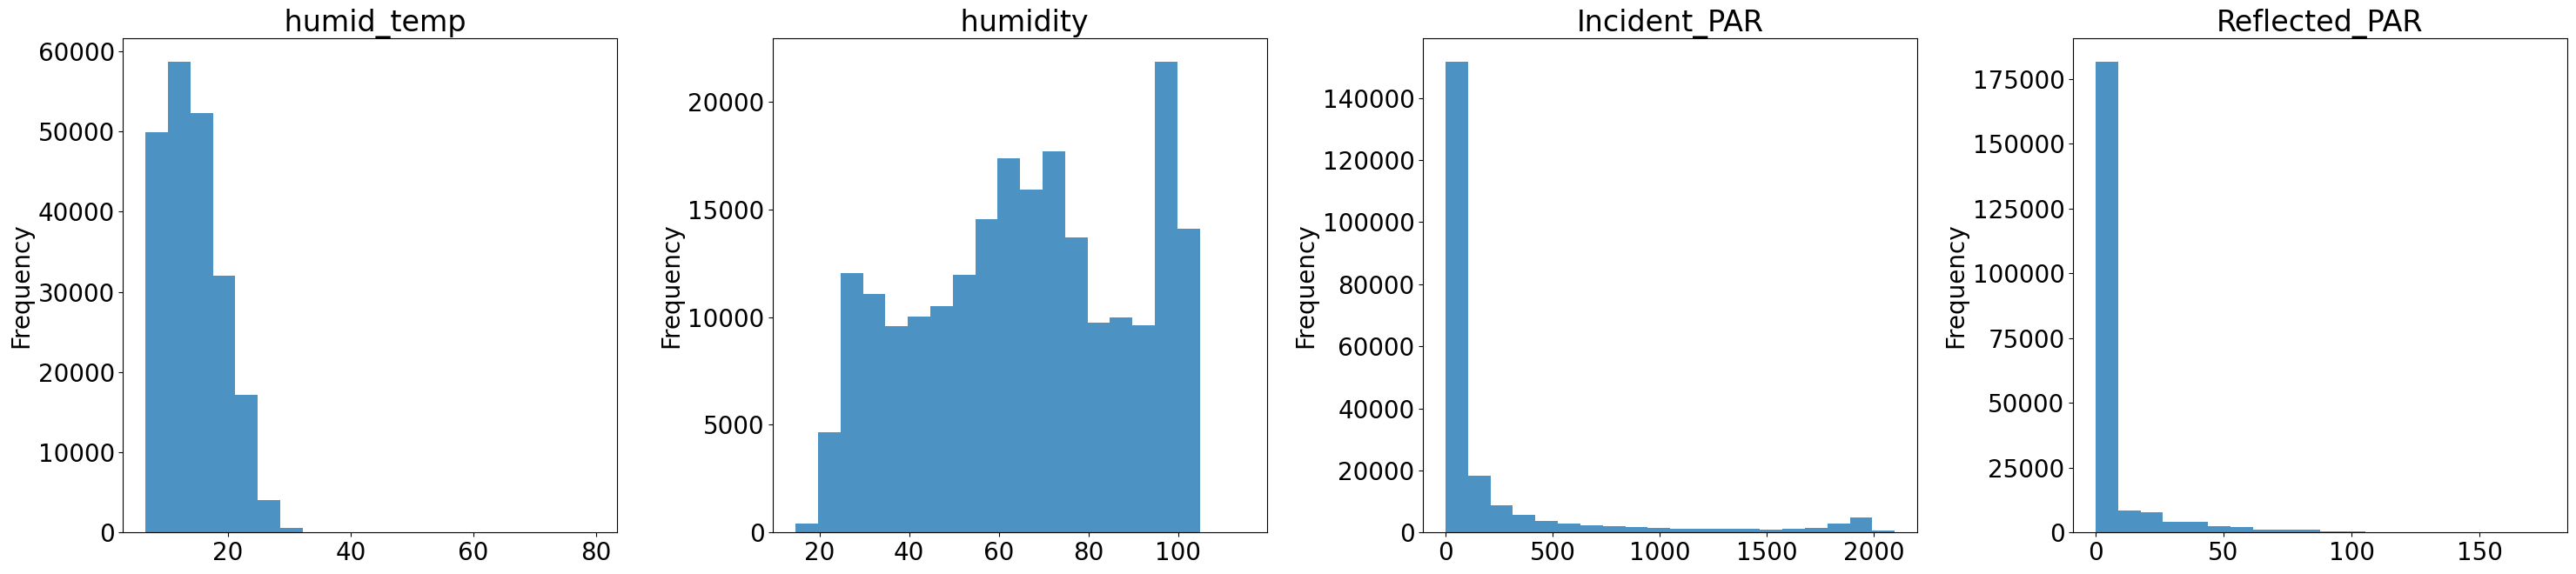

In [35]:
plt.rcParams.update({'font.size': 20})

variable_list = [' humid_temp',
                 ' humidity', 'Incident_PAR', 'Reflected_PAR']

fig, ax = plt.subplots(1,4, figsize=(30,7))
for i,var in enumerate(variable_list):
    
    sonoma_data_clean[var].plot.hist(ax=ax[i], alpha=0.8, color='tab:blue',bins=20)
    ax[i].set_title(var)
plt.tight_layout()

# Log Transform of Incident and Reflected PAR

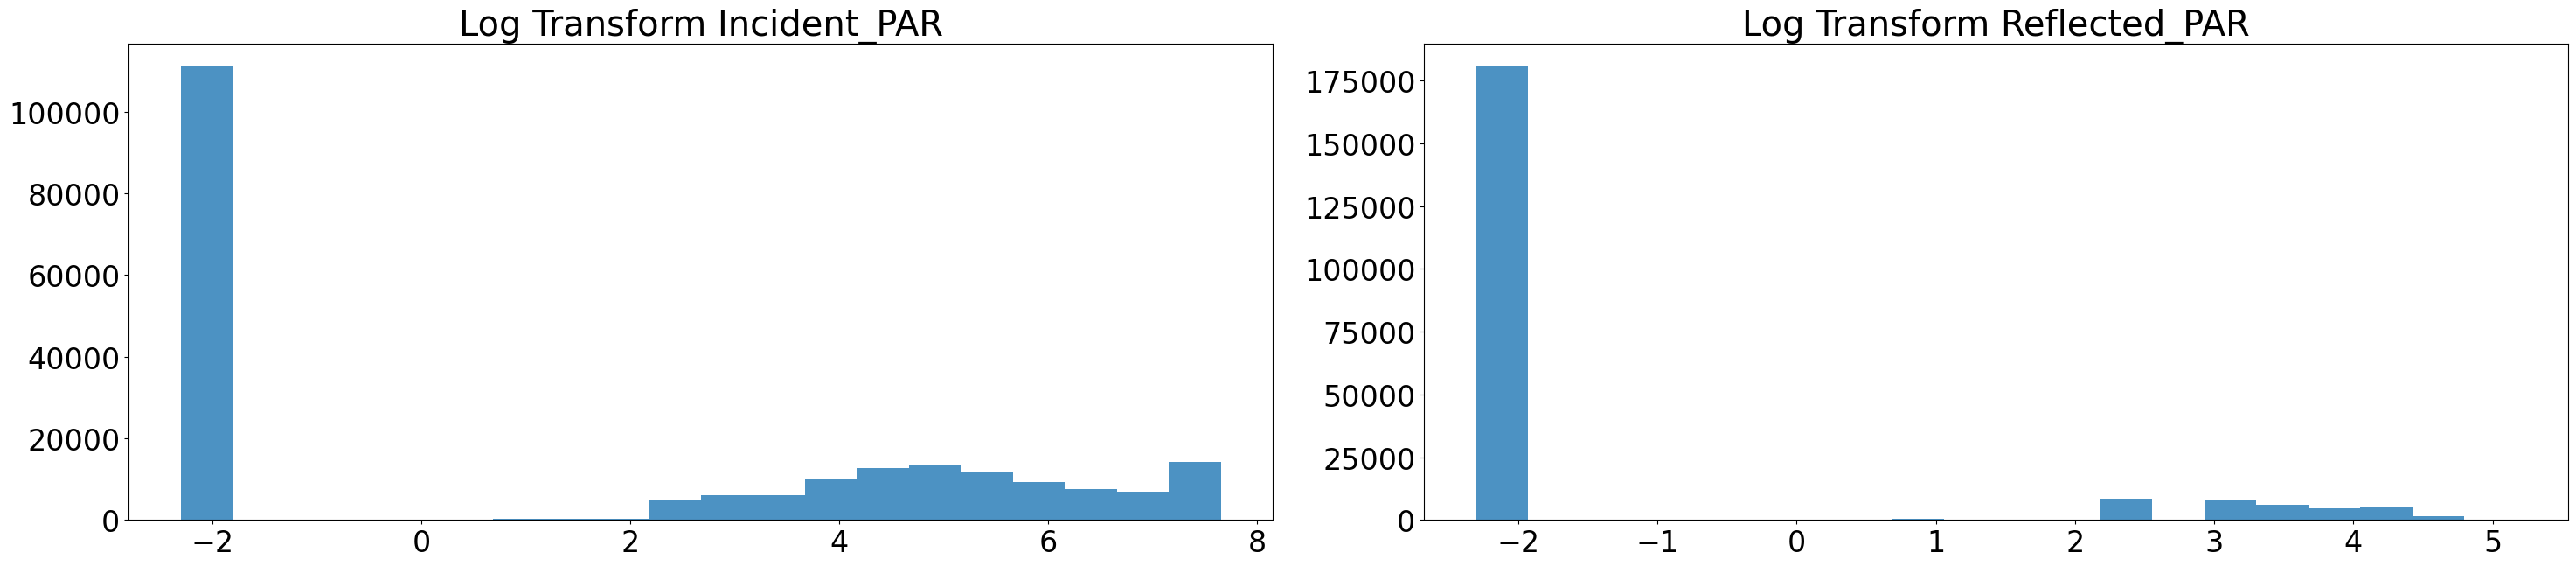

In [36]:
plt.rcParams.update({'font.size': 24})

variable_list = ['Incident_PAR', 'Reflected_PAR']

fig, ax = plt.subplots(1,2, figsize=(30,7))
for i,var in enumerate(variable_list):
    
    log_var = np.log(0.1+sonoma_data_clean[var])
    
    ax[i].hist(log_var, alpha=0.8, color='tab:blue',bins=20)
    ax[i].set_title('Log Transform ' + var)
plt.tight_layout()

We add a small constant to the values of incident PAR and reflected PAR before taking log due to the numerous 0 values in both the variables.

## Alternative Plot Log transform of only non - zero and incldue spearate graph for 0 vs non zeros values

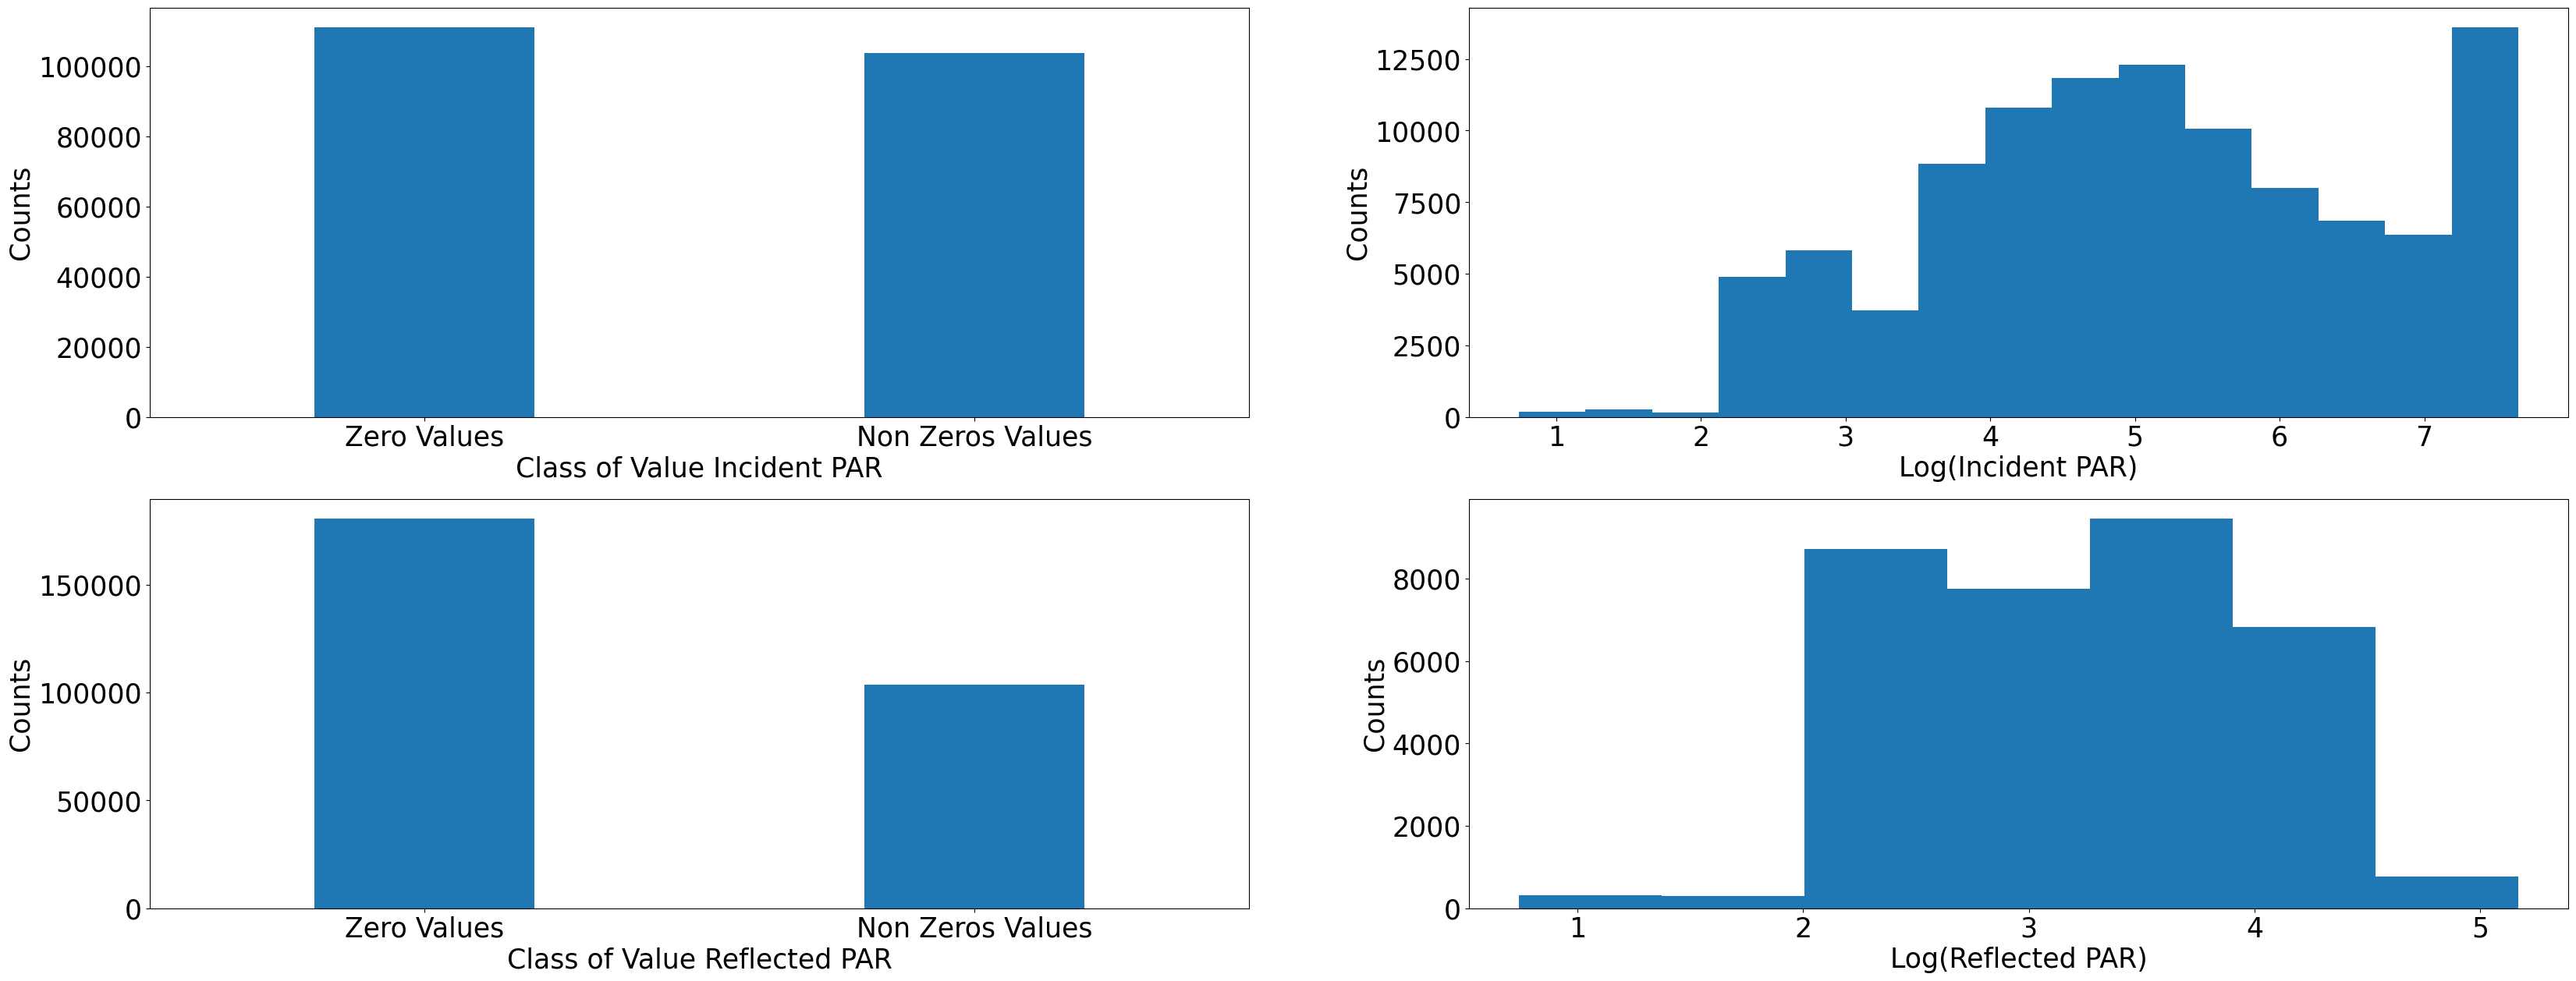

In [184]:
plt.rcParams.update({'font.size': 25})


# Incident PAR
n_zeros = np.sum(sonoma_data_clean['Incident_PAR'] == 0)
n_non_zeros = len(sonoma_data_clean) - n_zeros

fig,ax = plt.subplots(2,2, figsize=(40,15))

ax[0,0].bar(x=[0.25, 0.75],height=[n_zeros, n_non_zeros], width=0.2,tick_label=['Zero Values','Non Zeros Values'])
ax[0,0].set_xlim(0,1)

non_zero_values = sonoma_data_clean[sonoma_data_clean['Incident_PAR'] != 0]['Incident_PAR']
ax[0,1].hist(np.log(non_zero_values),bins=15)

ax[0,0].set_xlabel('Class of Value Incident PAR')
ax[0,0].set_ylabel("Counts")

ax[0,1].set_xlabel('Log(Incident PAR)')
ax[0,1].set_ylabel("Counts")

# Reflected PAR
# Incident PAR
n_zeros_ref = np.sum(sonoma_data_clean['Reflected_PAR'] == 0)
n_non_zeros_ref = len(sonoma_data_clean) - n_zeros

ax[1,0].bar(x=[0.25, 0.75],height=[n_zeros_ref, n_non_zeros_ref], width=0.2,tick_label=['Zero Values','Non Zeros Values'])
ax[1,0].set_xlim(0,1)

non_zero_values = sonoma_data_clean[sonoma_data_clean['Reflected_PAR'] != 0]['Reflected_PAR']
ax[1,1].hist(np.log(non_zero_values),bins=7)

ax[1,0].set_xlabel('Class of Value Reflected PAR')
ax[1,0].set_ylabel("Counts")

ax[1,1].set_xlabel('Log(Reflected PAR)')
ax[1,1].set_ylabel("Counts")




plt.show()

# Question b)

- Figure 3c) Tries to visualize the distributions in the various readings across all different nodes, ordered by heights. Ideally the set of readings captured at each height should show some variation in distribution (as presented by the boxplot) for different heights.

- Figure 3c) might obscure the temporal correlations between points in a boxplot.

- For incident PAR and Relative PAR, the box plot obscures the multimodality of the data (lots of zeros) and some other dsitribution

Try to improve by sub sampling nodes but plotting the full distribution (histogram) at larget height increments

<AxesSubplot:>

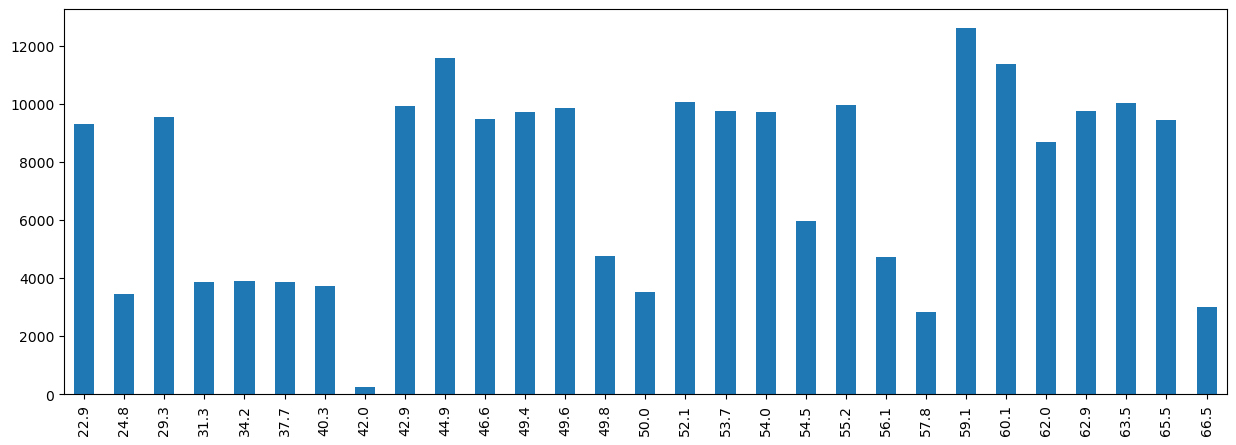

In [185]:

plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots(figsize=(15,5))
sonoma_data_clean['Height'].value_counts().sort_index().plot.bar(rot=90, ax=ax)

In [186]:
selected_heights = [29.3,31.3, 37.7,42.9, 46.6,49.4, 54.0,60.1, 65.5]

In [187]:
selected_heights[::-1]

[65.5, 60.1, 54.0, 49.4, 46.6, 42.9, 37.7, 31.3, 29.3]

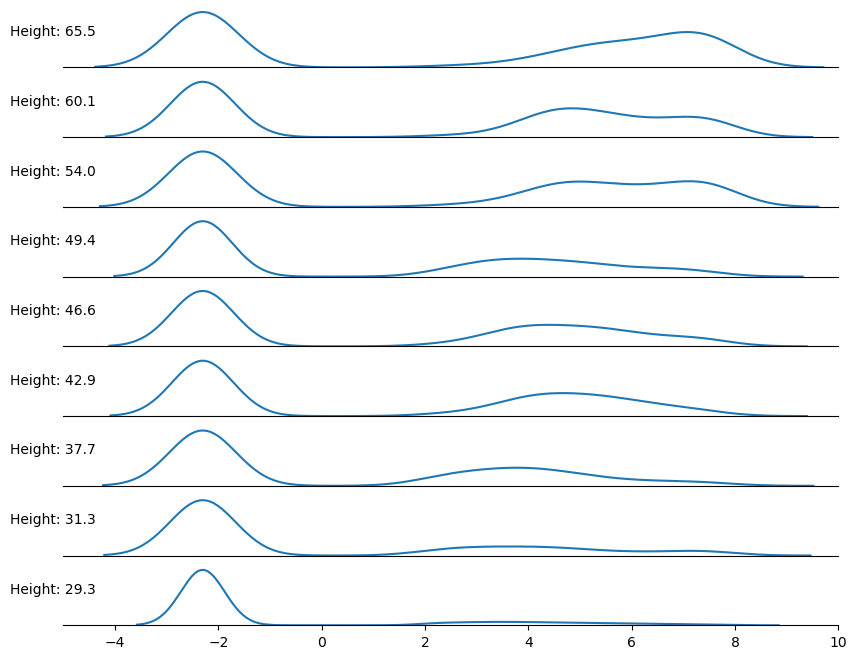

In [188]:
fig, ax = plt.subplots(len(selected_heights),1, figsize=(10,8))
for i,h in enumerate(selected_heights[::-1]):
    
    selected_data = sonoma_data_clean[sonoma_data_clean['Height']==h]
    
    #ax[i].hist(np.log(0.1+selected_data['Incident_PAR'].values),bins=15)
    sns.kdeplot(np.log(0.1+selected_data['Incident_PAR'].values),ax=ax[i])

    # Hide the right and top spines
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
    ax[i].spines.left.set_visible(False)
   # ax[i].set(ylabel=f'{h}',rotation=43)
    ax[i].set_ylabel(f'Height: {h}', rotation=0)
    ax[i].set_yticks([])
    ax[i].set_xlim(-5,10)
    if i < len(selected_heights)-1:
        ax[i].set_xticks([])
    #ax[i].set_xticks([])
    
    

## Alternative is to use a violin plot from seaborn

In [189]:
import seaborn as sns

In [258]:
selected_heights = [29.3,31.3, 37.7,42.9, 46.6,49.4, 54.0,60.1, 65.5]

In [260]:
#height_order = np.sort(sonoma_data_clean['Height'].unique())[::-1]
height_order = np.sort(selected_heights)[::-1]

In [261]:
sonoma_data_clean_plot = sonoma_data_clean[sonoma_data_clean['Height'].isin(height_order)]

In [262]:
sonoma_data_clean_plot['Log_Incident_Par'] = np.log(sonoma_data_clean_plot['Incident_PAR']+0.1)

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_81268/4071164257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonoma_data_clean_plot['Log_Incident_Par'] = np.log(sonoma_data_clean_plot['Incident_PAR']+0.1)


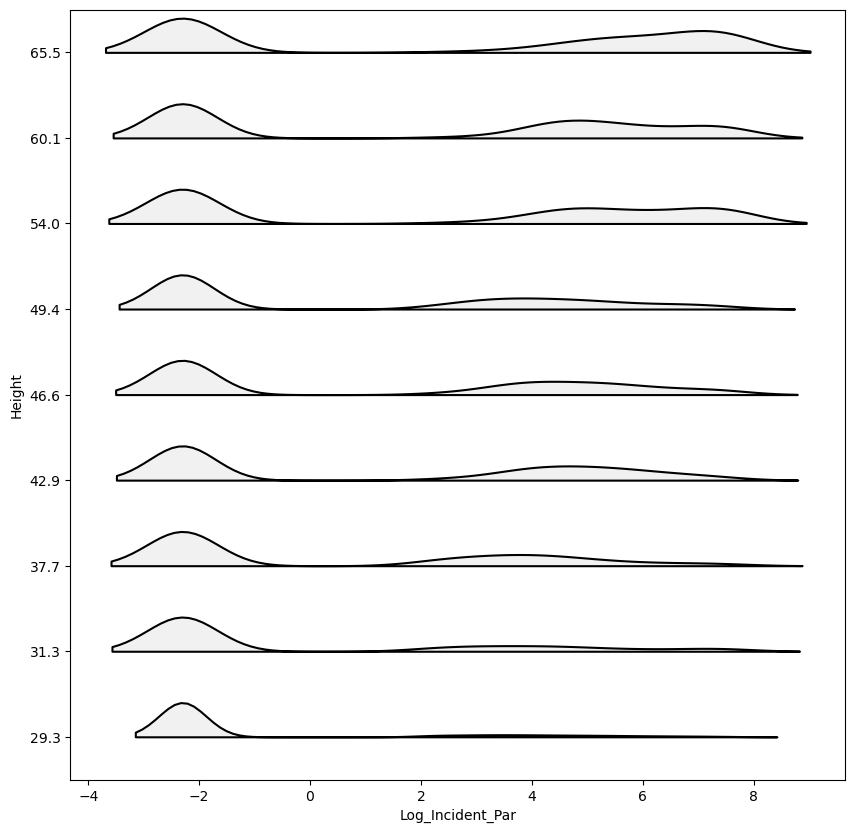

In [263]:
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.violinplot(
    data=sonoma_data_clean_plot,
    x="Log_Incident_Par", y="Height", hue=True,
    hue_order=[True, False], split=True, orient='h',order=height_order,color="black",
    inner=None,scale='area',linewdith=0.1)

#ax = sns.boxenplot(x=sonoma_data_clean_plot["Log_Incident_Par"],
#                   y=sonoma_data_clean_plot["Height"], color="red", width=0.05, orient='h')

ax.legend_ = None

# Question c)
- Improving Color
- Can try colouring by height
- Sat May 1 09:35:00 2004 − timestep 1062

In [41]:
# Loads the information
mote_location = pd.read_csv('Data/mote-location-data.txt',sep='\t',skiprows=1,header=None)

# Loads the headers
mote_location_head = pd.read_csv('Data/mote-location-data.txt',sep='\t',header=0).columns

# Clean the headers
col_names_mote_location = [x for x in mote_location_head[0].split(' ') if x!='']

# Set the column names
mote_location.columns = col_names_mote_location

In [42]:
mote_location

,ID,Height,Direc,Dist,Tree
0,24,10.5,WSW,0.1,edge
1,20,12.7,WSW,0.1,edge
2,27,14.9,WSW,0.1,edge
3,38,16.6,WSW,0.1,edge
4,0,16.9,NW,0.1,edge
...,...,...,...,...,...
75,105,62.9,SW,0.1,interior
76,118,63.5,SW,0.1,interior
77,109,64.5,SW,0.1,interior
78,113,65.5,SW,0.1,interior


In [43]:
nodeid_height_map = dict(zip(mote_location['ID'],mote_location['Height']))

In [44]:
time_data = sonoma_data_clean[(sonoma_data_clean['Epoch_datetime']<='2004-05-02') & \
                  (sonoma_data_clean['Epoch_datetime']>='2004-05-01')]

print(len(time_data[' nodeid'].unique()))
print(len(time_data[' nodeid'].unique()))

25
25


In [45]:
from matplotlib import colormaps
import matplotlib as mpl

In [46]:
node_id_list = time_data[['Epoch_datetime',' nodeid',' humidity']].groupby(['Epoch_datetime', ' nodeid'])\
    .mean()\
    .unstack().columns
node_id_list = [x[1] for x in node_id_list]
heights = np.array([nodeid_height_map[x] for x in node_id_list])
heights = np.nan_to_num(heights)
# normalize
heights = (heights-np.mean(heights))/np.std(heights) 
height_colors = [colormaps['coolwarm'](x) for x in heights]

### Humidity Plot with Colors for Height

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_81268/311492874.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


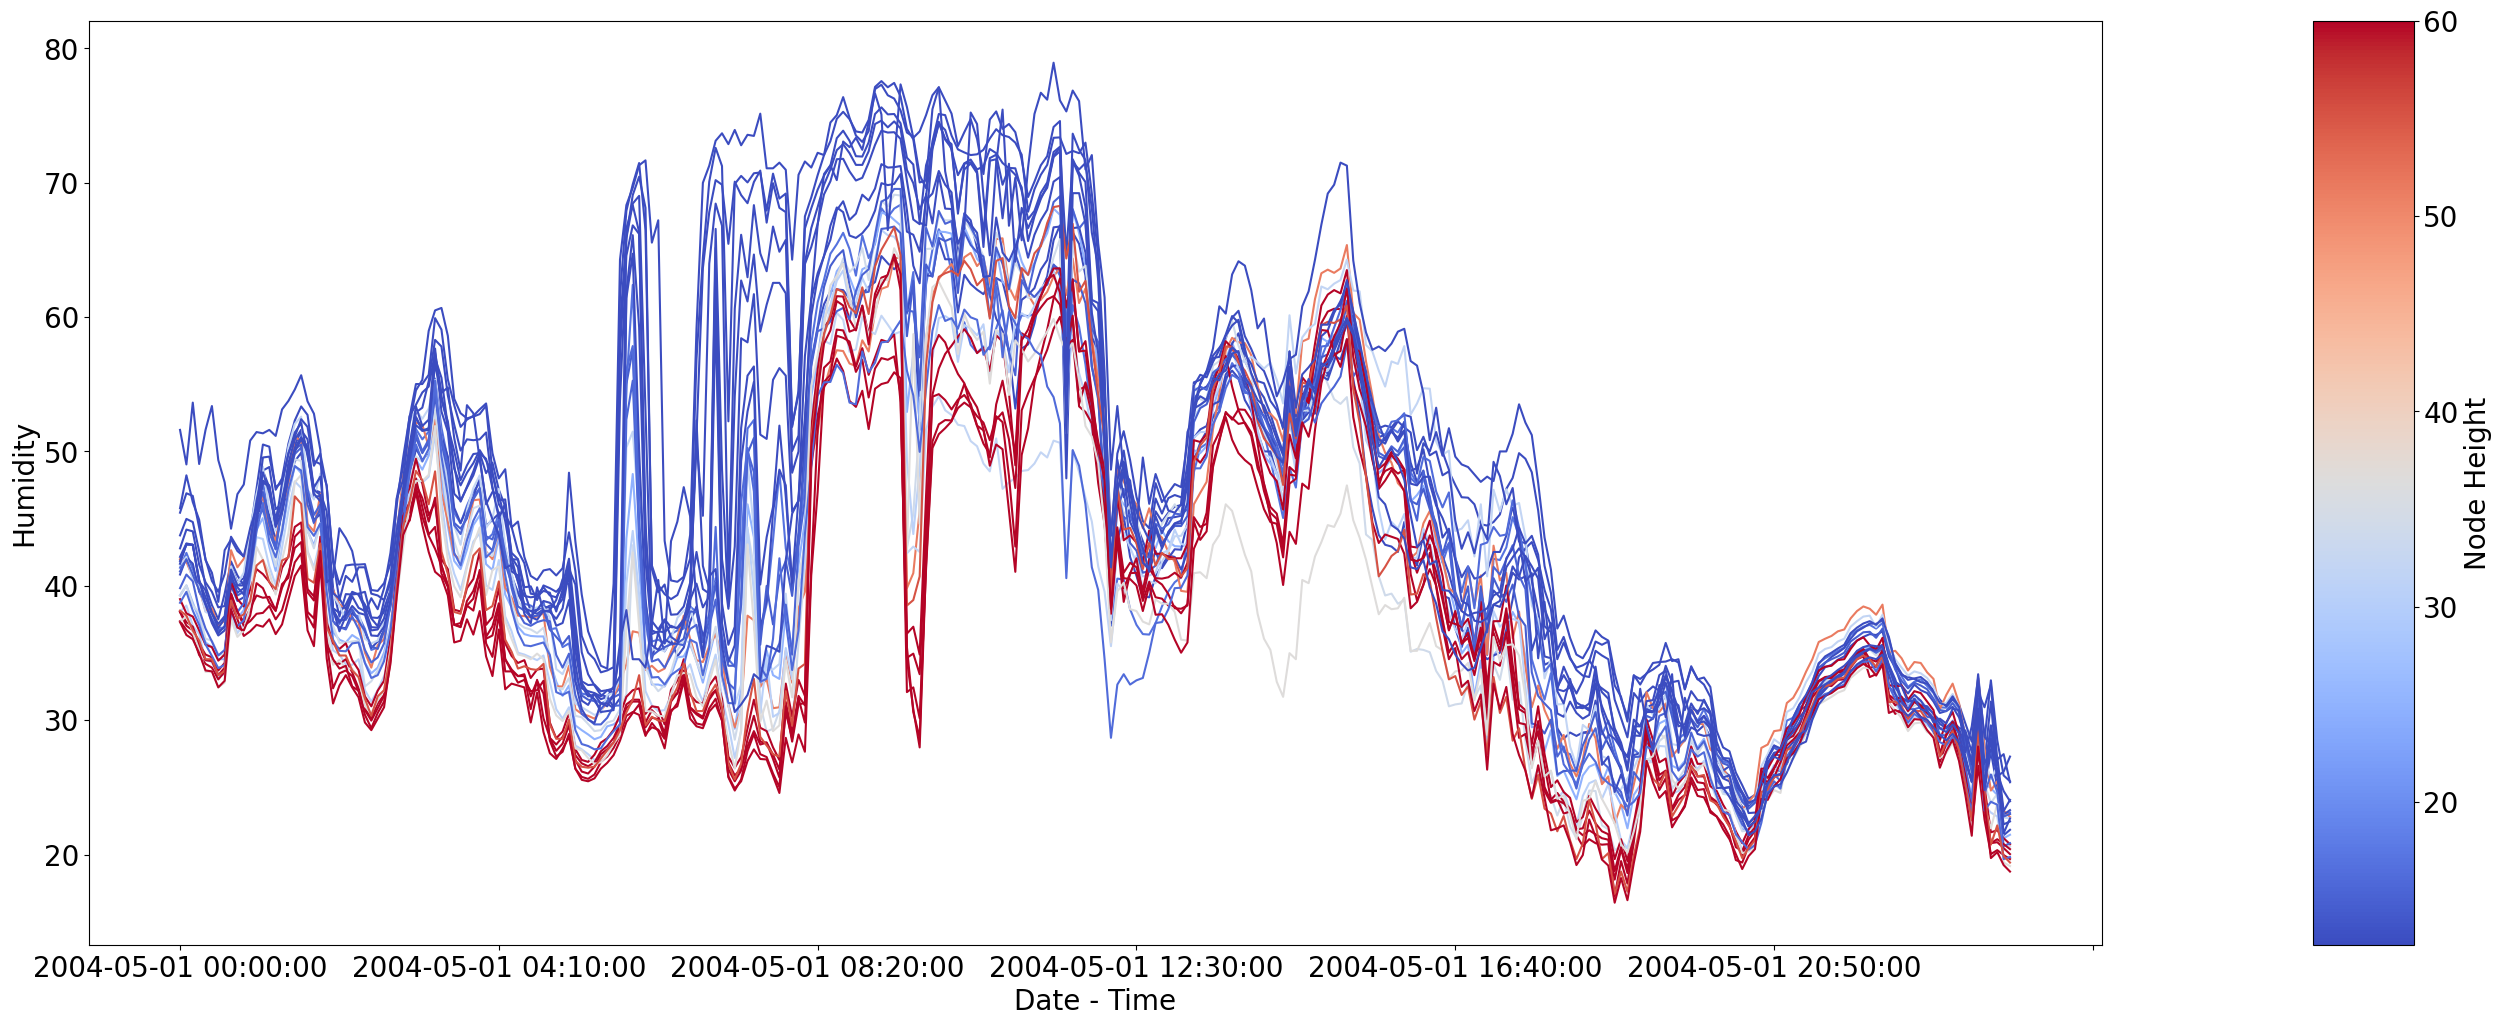

In [47]:
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(1,2,figsize=(30,12),gridspec_kw={'width_ratios': [20, 1]})

graph = time_data[['Epoch_datetime',' nodeid',' humidity']].groupby(['Epoch_datetime', ' nodeid'])\
    .mean()\
    .unstack().plot(ax = ax[0], legend=False,color = height_colors)

ax[0].set_xlabel('Date - Time')
ax[0].set_ylabel('Humidity')


cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=12.7, vmax=60)

cb1 = mpl.colorbar.ColorbarBase(ax[1], cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Node Height')

fig.show()



## Temperature Plot with Colors for Height

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_81268/1930159457.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


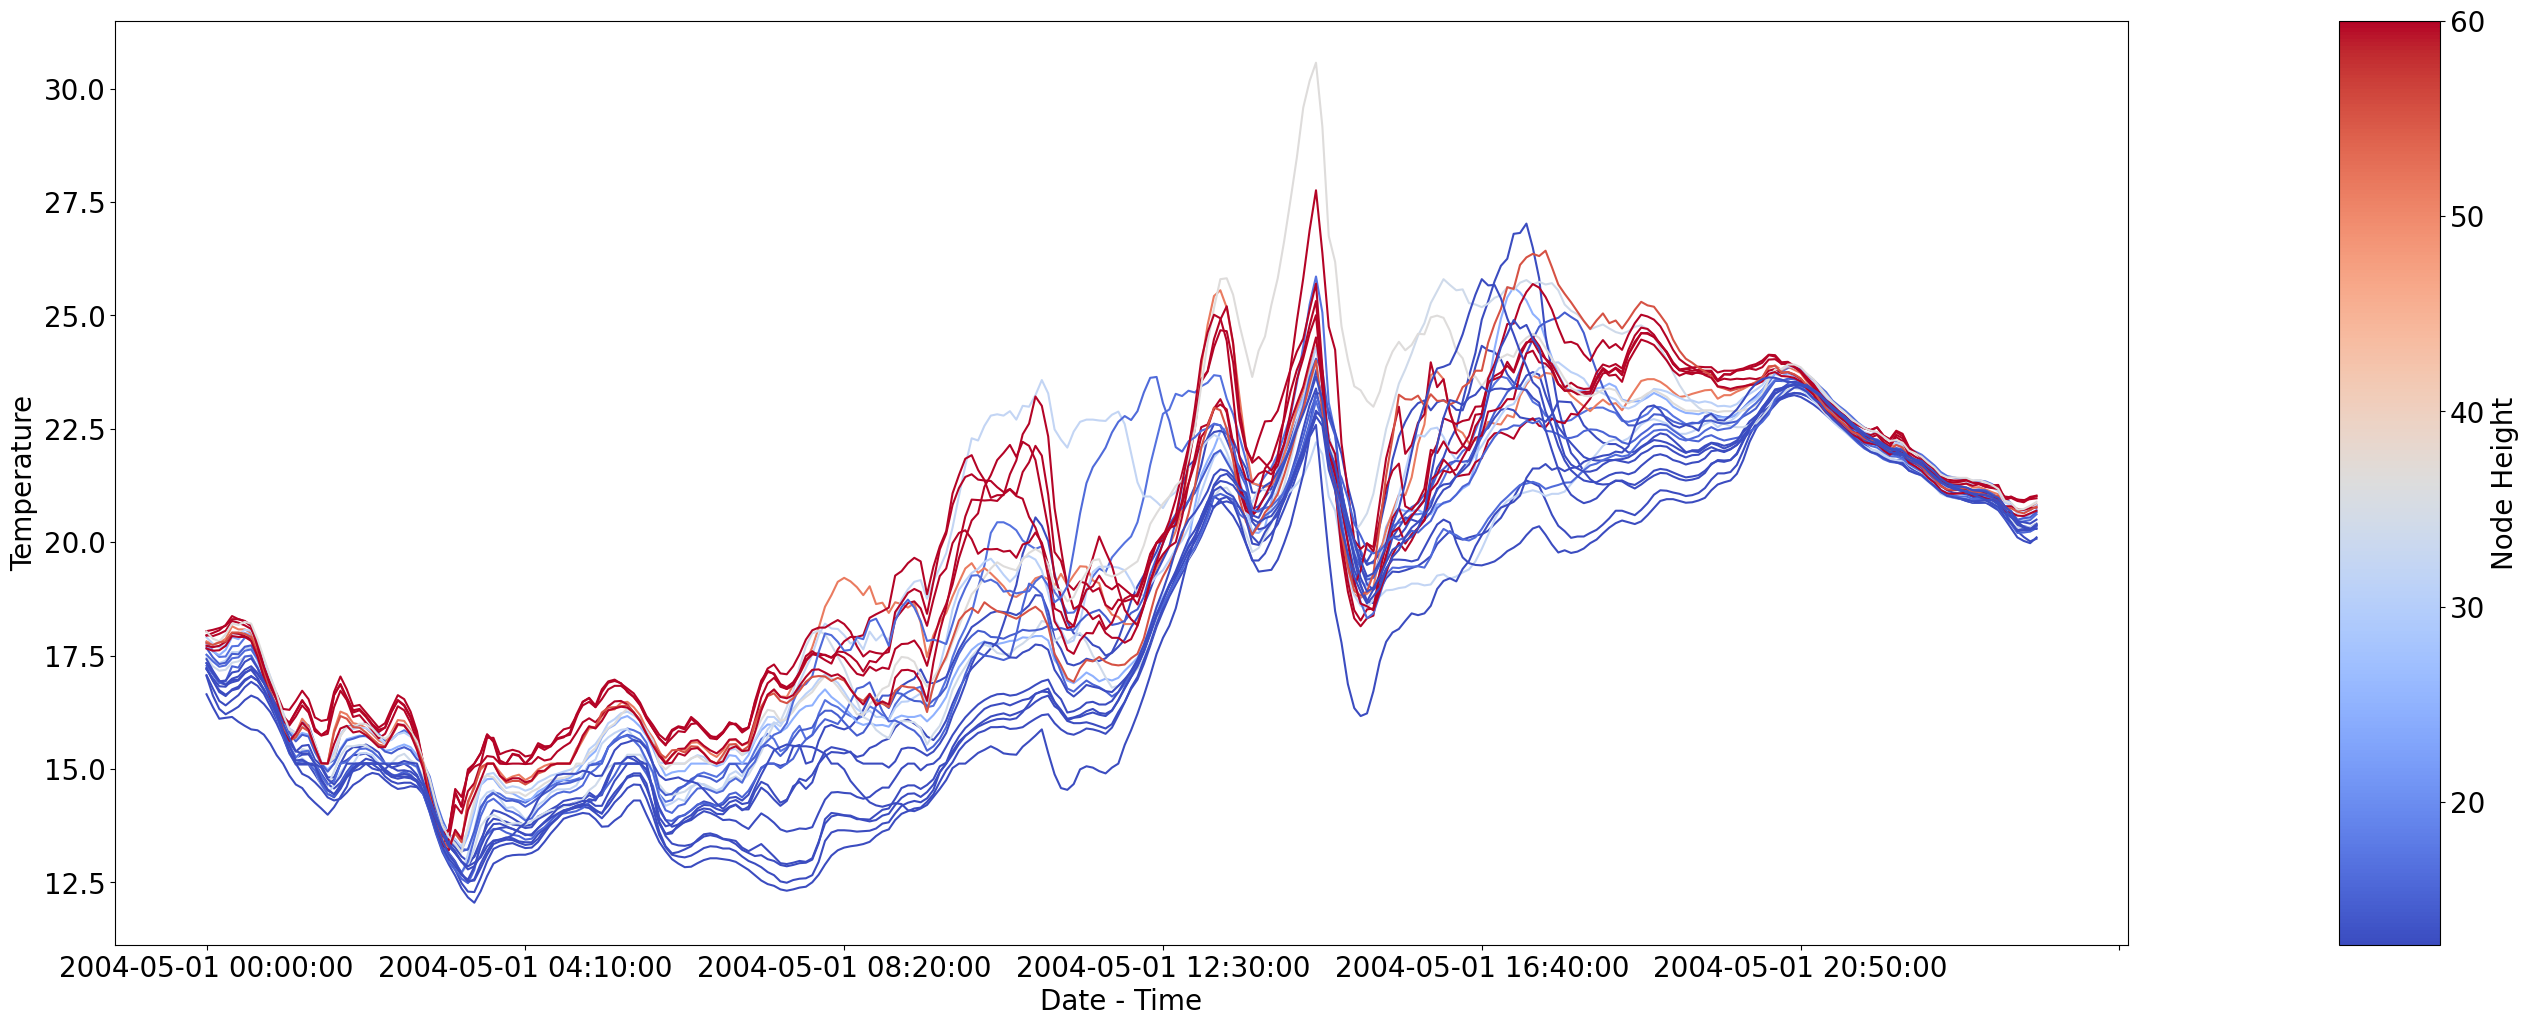

In [48]:
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(1,2,figsize=(30,12),gridspec_kw={'width_ratios': [20, 1]})

graph = time_data[['Epoch_datetime',' nodeid',' humid_temp']].groupby(['Epoch_datetime', ' nodeid'])\
    .mean()\
    .unstack().plot(ax = ax[0], legend=False,color = height_colors)

ax[0].set_xlabel('Date - Time')
ax[0].set_ylabel('Temperature')


cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=12.7, vmax=60)

cb1 = mpl.colorbar.ColorbarBase(ax[1], cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Node Height')

fig.show()


# Question d)

- In this part we re-work some plots for Figure 7a and 7b

In [319]:
final_ep = epoch_data[epoch_data['Epoch_datetime'] == '2004-06-10 14:00:00']['Epoch_No'].values[0]

In [417]:
epoch_data = pd.read_csv('data/epoch_data_processed.csv')
min_ep = epoch_data['Epoch_No'].min()
max_ep = final_ep
no_eps = max_ep-min_ep+1

sonoma_log = pd.read_csv('Data/sonoma-data-log.csv')
sonoma_net = pd.read_csv('Data/sonoma-data-net.csv')

sonoma_log = sonoma_log.groupby([' epoch', ' nodeid'], as_index=False).first()
sonoma_net = sonoma_net.groupby([' epoch', ' nodeid'], as_index=False).first()

#nodeid_list = list(set(list(sonoma_log[' nodeid'].unique()) + list(sonoma_net[' nodeid'].unique())))
nodeid_list = list(sonoma_net[' nodeid'].unique())

yield_frame_net = []
yield_frame_log = []
for epo in range(min_ep, max_ep+1):
    df = pd.DataFrame([nodeid_list,len(nodeid_list)*[epo]]).T
    df.columns = ['nodeid','epoch']
    
    yield_frame_net.append(df)
    yield_frame_log.append(df)
    
yield_frame_net = pd.concat(yield_frame_net)
yield_frame_log = pd.concat(yield_frame_log)

In [418]:
temp_frame_net = yield_frame_net.merge(sonoma_net, how='left', left_on=['nodeid','epoch'],
                 right_on=[' nodeid',' epoch'])

temp_frame_log = yield_frame_log.merge(sonoma_log, how='left', left_on=['nodeid','epoch'],
                 right_on=[' nodeid',' epoch'])


# Get which points have yield
point_yield_net = (temp_frame_net.isna() == 1).sum(1) == 0
yield_frame_net['Has_data'] = point_yield_net.values
yield_frame_net['Source'] = 'net'


point_yield_log = (temp_frame_log.isna() == 1).sum(1) == 0
yield_frame_log['Has_data'] = point_yield_log.values
yield_frame_log['Source'] = 'log'


yield_frame = pd.concat([yield_frame_net, yield_frame_log])

Add Time Data

In [419]:
# Merging with dates for each epoch no
yield_frame_time = yield_frame.merge(epoch_data,left_on='epoch', right_on='Epoch_No', how='left')

# Getting the date in days to recreate plot
yield_frame_time['Epoch_date'] = pd.to_datetime(yield_frame_time['Epoch_datetime']).apply(lambda x: x.date())

In [420]:
yield_frame_time

,nodeid,epoch,Has_data,Source,Epoch_No,Epoch_Days,Epoch_datetime,Epoch_date
0,105,1,False,net,1,12536.006944,2004-04-27 17:10:00,2004-04-27
1,113,1,False,net,1,12536.006944,2004-04-27 17:10:00,2004-04-27
2,119,1,False,net,1,12536.006944,2004-04-27 17:10:00,2004-04-27
3,127,1,False,net,1,12536.006944,2004-04-27 17:10:00,2004-04-27
4,138,1,False,net,1,12536.006944,2004-04-27 17:10:00,2004-04-27
...,...,...,...,...,...,...,...,...
783365,196,12635,False,log,12635,12579.875000,2004-06-10 14:00:00,2004-06-10
783366,135,12635,False,log,12635,12579.875000,2004-06-10 14:00:00,2004-06-10
783367,14,12635,False,log,12635,12579.875000,2004-06-10 14:00:00,2004-06-10
783368,80,12635,False,log,12635,12579.875000,2004-06-10 14:00:00,2004-06-10


In [421]:
yield_per_time = yield_frame_time[['Epoch_date','Has_data','Source']].groupby(['Epoch_date','Source'],
                                                             as_index=False).mean()

## Difference Plot for Fig a,b 2nd plot

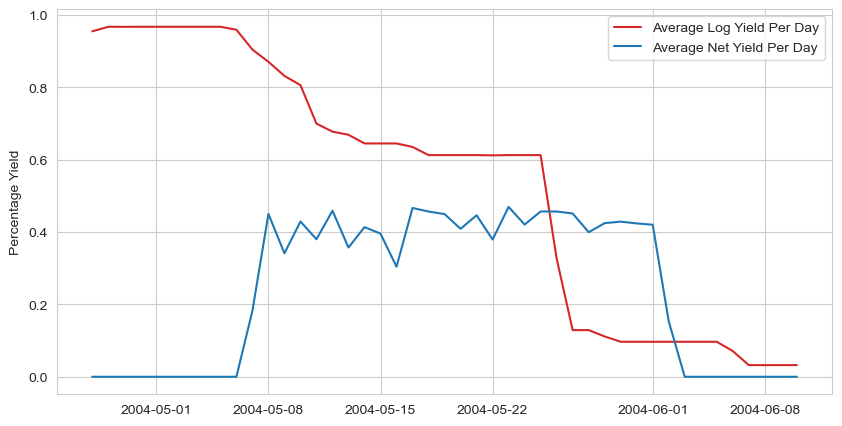

In [553]:
sns.set_style('whitegrid')
fig,ax= plt.subplots(1,1,figsize=(10,5))

ax.plot(yield_per_time[yield_per_time['Source']=='log']['Epoch_date'],
        yield_per_time[yield_per_time['Source']=='log']['Has_data'], label='Average Log Yield Per Day',
        c='tab:red')

ax.plot(yield_per_time[yield_per_time['Source']=='net']['Epoch_date'],
        yield_per_time[yield_per_time['Source']=='net']['Has_data'], label='Average Net Yield Per Day',
        c='tab:blue')


ax.set_ylabel('Percentage Yield')
ax.legend()

## Difference Plot of Node Yield

Aggregate Information by Node over time

In [426]:
yield_frame_node = yield_frame_time[['nodeid','Source',
                                     'Has_data']].groupby(['nodeid','Source'], as_index=False).mean()

Add in height information to node

Load Height Information

In [438]:
# Loads the information
mote_location = pd.read_csv('Data/mote-location-data.txt',sep='\t',skiprows=1,header=None)

# Loads the headers
mote_location_head = pd.read_csv('Data/mote-location-data.txt',sep='\t',header=0).columns

# Clean the headers
col_names_mote_location = [x for x in mote_location_head[0].split(' ') if x!='']

# Set the column names
mote_location.columns = col_names_mote_location

Join Height Information and drop the node with no height

In [439]:
yield_frame_node = yield_frame_node.merge(mote_location,
                how='left',
                left_on='nodeid',
                right_on='ID')
yield_frame_node = yield_frame_node[~yield_frame_node['Height'].isna()]

In [445]:
node_heights = np.sort(yield_frame_node['Height'].unique())
node_heights

array([22.9, 24.8, 29.3, 31.3, 34.2, 37.7, 40.3, 42. , 42.9, 44.9, 46.6,
       49.4, 49.6, 49.8, 50. , 52.1, 53.7, 54. , 54.5, 55.2, 56.1, 57.8,
       59.1, 60.1, 61.1, 62. , 62.9, 63.5, 65.5, 66.5])

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_81268/1162864461.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(node_heights)


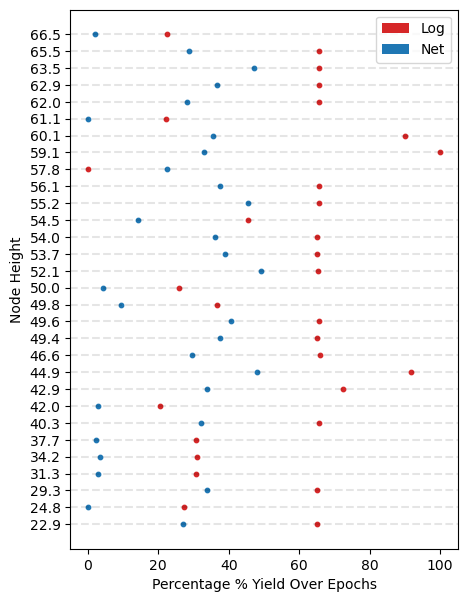

In [550]:
fig,ax = plt.subplots(figsize=(5,7))
for i,h in enumerate(node_heights):
    
    log_val = yield_frame_node[(yield_frame_node['Height']==h)&
                               (yield_frame_node['Source']=='log')]['Has_data'].values[0]
    net_val = yield_frame_node[(yield_frame_node['Height']==h)&
                               (yield_frame_node['Source']=='net')]['Has_data'].values[0]
    
    log_height = i
    net_height = i
    
    ax.scatter(log_val*100, log_height, c='tab:red', s=10)
    ax.scatter(net_val*100, net_height, c='tab:blue', s=10)
    ax.axhline(i, ls='--',alpha=0.1,c='k')
    #ax.text(x=-15,y=i-0.1,s=str(h))
ax.set_yticklabels(node_heights)
ax.set_yticks(list(range(len(node_heights))))

ax.set_xlabel('Percentage % Yield Over Epochs')
ax.set_ylabel('Node Height')#,loc="top",rotation="horizontal")

# Legend
from matplotlib.patches import Patch

custom_lines = [#Line2D([0], [0], color='tab:red', lw=4),
                #Line2D([0], [0], color='tab:blue', lw=4)
                Patch(facecolor='tab:red'),
                Patch(facecolor='tab:blue')]

custom_patches  = [
                Patch(facecolor='tab:red'),
                Patch(facecolor='tab:blue')]

ax.legend(custom_patches, ['Log', 'Net'])

plt.show()

## Average Difference for Node Lifetime Indicator

In [543]:
node_survival_times = yield_frame_time[['nodeid','Source',
                                        'Has_data','Epoch_date']].groupby(['nodeid','Source','Epoch_date'],
                                                            as_index=False).sum() 
node_survival_times['Alive'] = node_survival_times['Has_data']>0
node_survival_times = node_survival_times[['nodeid',
                                           'Source',
                                           'Alive']].groupby(['nodeid','Source'],
                                                            as_index=False).sum()

In [546]:
node_survival_times = node_survival_times.merge(mote_location,
                how='left',
                left_on='nodeid',
                right_on='ID')
node_survival_times = node_survival_times[~node_survival_times['Height'].isna()]

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_81268/3502670965.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(node_heights)


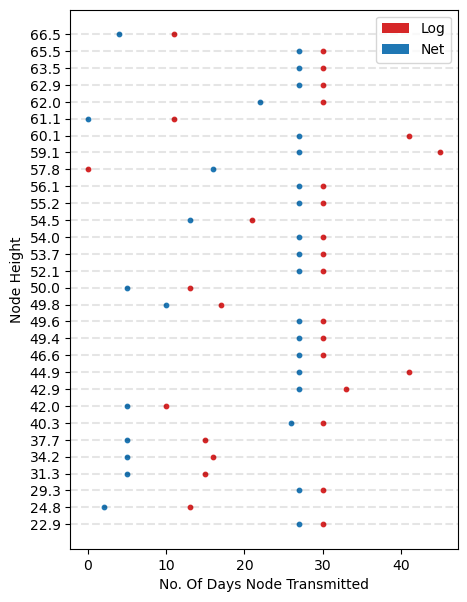

In [549]:
fig,ax = plt.subplots(figsize=(5,7))
for i,h in enumerate(node_heights):
    
    log_val = node_survival_times[(node_survival_times['Height']==h)&
                               (node_survival_times['Source']=='log')]['Alive'].values[0]
    net_val = node_survival_times[(node_survival_times['Height']==h)&
                               (node_survival_times['Source']=='net')]['Alive'].values[0]
    
    log_height = i
    net_height = i
    
    ax.scatter(log_val, log_height, c='tab:red', s=10)
    ax.scatter(net_val, net_height, c='tab:blue', s=10)
    ax.axhline(i, ls='--',alpha=0.1,c='k')
    #ax.text(x=-15,y=i-0.1,s=str(h))
ax.set_yticklabels(node_heights)
ax.set_yticks(list(range(len(node_heights))))

ax.set_xlabel('No. Of Days Node Transmitted')
ax.set_ylabel('Node Height')#,loc="top",rotation="horizontal")

# Legend
from matplotlib.patches import Patch

custom_lines = [#Line2D([0], [0], color='tab:red', lw=4),
                #Line2D([0], [0], color='tab:blue', lw=4)
                Patch(facecolor='tab:red'),
                Patch(facecolor='tab:blue')]

custom_patches  = [
                Patch(facecolor='tab:red'),
                Patch(facecolor='tab:blue')]

ax.legend(custom_patches, ['Log', 'Net'])

plt.show()

# This chunk puts all previous plots into one line

In [576]:
[x for x in ax[0].get_xticklabels()]

[Text(12539.0, 0, '2004-05-01'),
 Text(12546.0, 0, '2004-05-08'),
 Text(12553.0, 0, '2004-05-15'),
 Text(12560.0, 0, '2004-05-22'),
 Text(12570.0, 0, '2004-06-01'),
 Text(12577.0, 0, '2004-06-08')]

In [578]:
xl = ['05-01', '05-08', '05-15','05-22', '06-01','06-08']

/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_81268/4291840879.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(xl)
/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_81268/4291840879.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(node_heights)
/var/folders/0p/10_vdl_n673_r_lydsdd278m0000gn/T/ipykernel_81268/4291840879.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_yticklabels(node_heights)


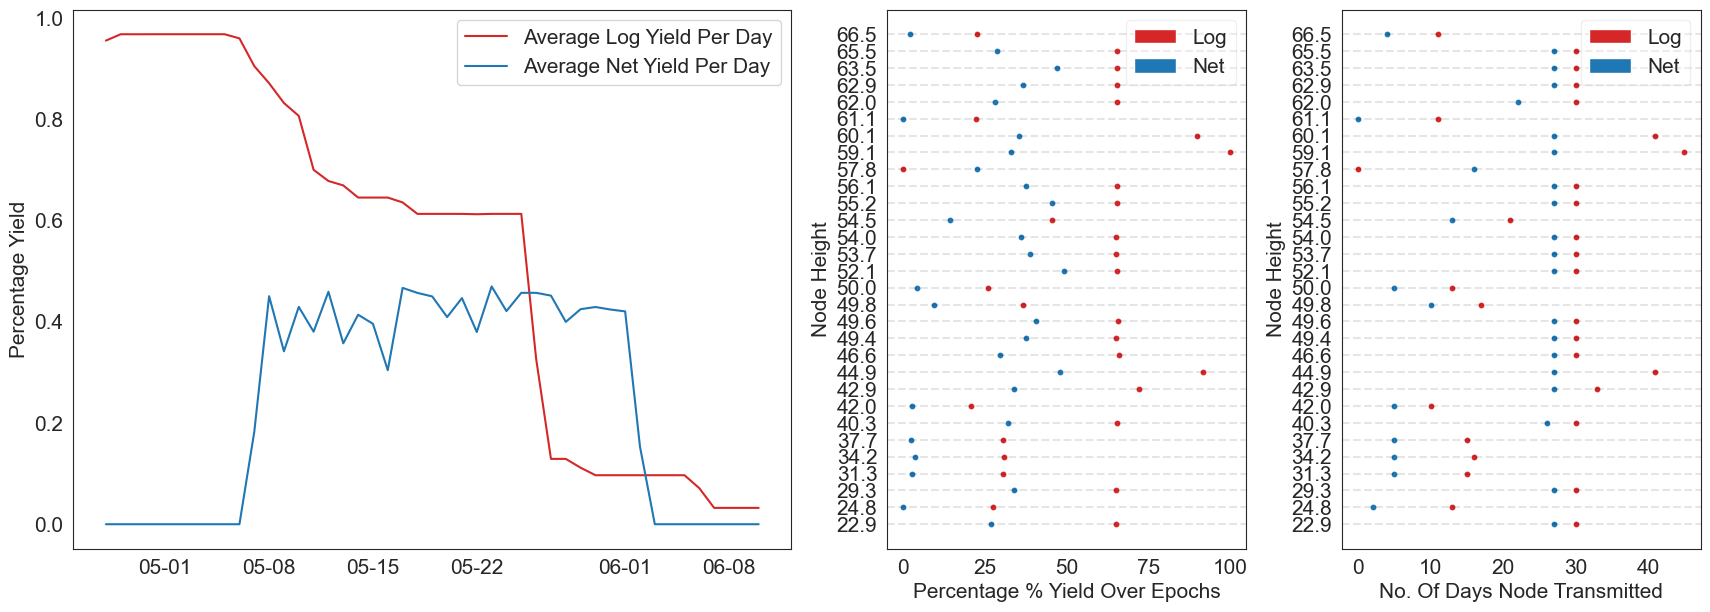

In [579]:
plt.rcParams.update({'font.size': 15})


sns.set_style('white')
fig,ax= plt.subplots(1,3,figsize=(21,7),gridspec_kw={'width_ratios':[2,1,1],})

ax[0].plot(yield_per_time[yield_per_time['Source']=='log']['Epoch_date'],
        yield_per_time[yield_per_time['Source']=='log']['Has_data'], label='Average Log Yield Per Day',
        c='tab:red')

ax[0].plot(yield_per_time[yield_per_time['Source']=='net']['Epoch_date'],
        yield_per_time[yield_per_time['Source']=='net']['Has_data'], label='Average Net Yield Per Day',
        c='tab:blue')


ax[0].set_ylabel('Percentage Yield')
ax[0].legend()
ax[0].set_xticklabels(xl)
#sns.set_style('white')
# second plot
for i,h in enumerate(node_heights):
    
    log_val = yield_frame_node[(yield_frame_node['Height']==h)&
                               (yield_frame_node['Source']=='log')]['Has_data'].values[0]
    net_val = yield_frame_node[(yield_frame_node['Height']==h)&
                               (yield_frame_node['Source']=='net')]['Has_data'].values[0]
    
    log_height = i
    net_height = i
    
    ax[1].scatter(log_val*100, log_height, c='tab:red', s=10)
    ax[1].scatter(net_val*100, net_height, c='tab:blue', s=10)
    ax[1].axhline(i, ls='--',alpha=0.1,c='k')
    #ax.text(x=-15,y=i-0.1,s=str(h))
ax[1].set_yticklabels(node_heights)
ax[1].set_yticks(list(range(len(node_heights))))

ax[1].set_xlabel('Percentage % Yield Over Epochs')
ax[1].set_ylabel('Node Height')#,loc="top",rotation="horizontal")

# Legend
from matplotlib.patches import Patch

custom_lines = [#Line2D([0], [0], color='tab:red', lw=4),
                #Line2D([0], [0], color='tab:blue', lw=4)
                Patch(facecolor='tab:red'),
                Patch(facecolor='tab:blue')]

custom_patches  = [
                Patch(facecolor='tab:red'),
                Patch(facecolor='tab:blue')]

ax[1].legend(custom_patches, ['Log', 'Net'],loc='upper right',framealpha=0.3)

# Third Plot
for i,h in enumerate(node_heights):
    
    log_val = node_survival_times[(node_survival_times['Height']==h)&
                               (node_survival_times['Source']=='log')]['Alive'].values[0]
    net_val = node_survival_times[(node_survival_times['Height']==h)&
                               (node_survival_times['Source']=='net')]['Alive'].values[0]
    
    log_height = i
    net_height = i
    
    ax[2].scatter(log_val, log_height, c='tab:red', s=10)
    ax[2].scatter(net_val, net_height, c='tab:blue', s=10)
    ax[2].axhline(i, ls='--',alpha=0.1,c='k')
    #ax.text(x=-15,y=i-0.1,s=str(h))
ax[2].set_yticklabels(node_heights)
ax[2].set_yticks(list(range(len(node_heights))))

ax[2].set_xlabel('No. Of Days Node Transmitted')
ax[2].set_ylabel('Node Height')#,loc="top",rotation="horizontal")

# Legend
from matplotlib.patches import Patch

custom_lines = [#Line2D([0], [0], color='tab:red', lw=4),
                #Line2D([0], [0], color='tab:blue', lw=4)
                Patch(facecolor='tab:red'),
                Patch(facecolor='tab:blue')]

custom_patches  = [
                Patch(facecolor='tab:red'),
                Patch(facecolor='tab:blue')]

ax[2].legend(custom_patches, ['Log', 'Net'],loc='upper right',framealpha=0.3)

plt.show()
